In [2]:
import os
import time
import sys
import mlrose_hiive as mlrose
from random import randint
from random import seed
import matplotlib.pyplot as plt
import numpy as np

os.chdir(r'C:/Users/xpj/Desktop/OMSCS/CS7641/HW/HW2')

In [3]:
#set problem size
#change max_iteration
#assess time

seed(2022)

# Initialize fitness function object using coords_list
fitness = mlrose.FlipFlop()

# Define optimization problem object
problem = mlrose.DiscreteOpt(length = 1000, fitness_fn = fitness, maximize=True)
problem.set_mimic_fast_mode(True)

#MAX IS BEST!

In [30]:
#change iter
array2 = ["time_array2","fit_array2"]
meth = ["_rhc","_ga","_sa","_mimic"]
schedule = mlrose.ExpDecay()
for m in meth:
    for a in array2:
        globals()[a + m]=[]
        
iter = range(0,750,100)
max_attempt = 10


for max_iter in iter:
    print(max_iter)
    start = time.time()
    _, best_fitness_rhc, _ = mlrose.random_hill_climb(problem, max_attempts = max_attempt, 
                                                        max_iters = max_iter,restarts=8 )
    end = time.time()
    time_rhc = end - start
    time_array2_rhc.append(time_rhc)
    fit_array2_rhc.append(best_fitness_rhc)
    
    start = time.time()
    _, best_fitness_ga,_ = mlrose.genetic_alg(problem, random_state = 2,max_iters = max_iter,
                                                max_attempts=max_attempt,mutation_prob = 0.2,pop_size = 200)
    end = time.time()
    time_ga = end - start
    time_array2_ga.append(time_ga)
    fit_array2_ga.append(best_fitness_ga)

    
    start = time.time()
    _, best_fitness_sa,_ = mlrose.simulated_annealing(problem, schedule = schedule,
                                                              max_attempts = max_attempt, max_iters = max_iter,
                                                              random_state = 2)
    end = time.time()
    time_sa = end - start
    time_array2_sa.append(time_sa)
    fit_array2_sa.append(best_fitness_sa)

    print("mimic")
    start = time.time()
    _, best_fitness_mimic, _ = mlrose.mimic(problem, pop_size = 300, 
                                              max_attempts = max_attempt, max_iters = max_iter)
    end = time.time()
    time_mimic = end - start
    time_array2_mimic.append(time_mimic)
    fit_array2_mimic.append(best_fitness_mimic)

    
    print(best_fitness_rhc, best_fitness_ga, best_fitness_sa, best_fitness_mimic)
    

0
mimic
522.0 469.0 469.0 499.0
100
mimic
559.0 592.0 513.0 773.0
200
mimic
569.0 592.0 567.0 772.0
300
mimic
564.0 592.0 599.0 785.0
400
mimic
547.0 592.0 627.0 784.0
500
mimic
548.0 592.0 641.0 786.0
600
mimic
548.0 592.0 661.0 779.0
700
mimic
554.0 592.0 675.0 790.0


In [24]:
fit_array2_mimic_cp = fit_array2_mimic
fit_array2_mimic=[]
for max_iter in iter:
    print(max_iter)
    start = time.time()
    _, best_fitness_mimic, _ = mlrose.mimic(problem, pop_size = 500, 
                                              max_attempts = max_attempt, max_iters = max_iter)
    end = time.time()
    time_mimic = end - start
    time_array2_mimic.append(time_mimic)
    fit_array2_mimic.append(best_fitness_mimic)
print(fit_array2_mimic)

0
100


KeyboardInterrupt: 

In [5]:
#fitness based on parameters
array3 = "fit_array3"
for m in meth:
    globals()[array3 + m]=[]

#RHC
restarts = range(0,20)
for r in restarts:
    _, best_fitness_rhc, _ = mlrose.random_hill_climb(problem, max_attempts = 10, 
                                                    max_iters = 1000, restarts = r )
    fit_array3_rhc.append(best_fitness_rhc)
print(fit_array3_rhc)

[553.0, 520.0, 559.0, 533.0, 540.0, 570.0, 592.0, 540.0, 580.0, 607.0, 553.0, 587.0, 573.0, 547.0, 579.0, 557.0, 551.0, 567.0, 569.0, 576.0]


In [23]:
#GA
mutation = [0.2,0.3]
pop = [200,300]
iter = range(0,750,100)
fit_ga_df = np.zeros((6,len(iter)))


j = 0

for m in mutation:
    for p in pop:
        i = 0
        for max_iter in iter:
            _, best_fitness_ga,_ = mlrose.genetic_alg(problem, random_state = 2,
                                                  max_attempts=10, mutation_prob = m,
                                                  pop_size = p,max_iters = max_iter )
            fit_ga_df[j][i] = best_fitness_ga
            i = i+1
            print(i)
        j = j + 1
print(fit_ga_df)

1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
[[469. 592. 592. 592. 592. 592. 592. 592.]
 [469. 567. 567. 567. 567. 567. 567. 567.]
 [469. 570. 570. 570. 570. 570. 570. 570.]
 [469. 574. 574. 574. 574. 574. 574. 574.]
 [  0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.]]


In [25]:

fit_ga_df2=fit_ga_df[0:4]
fit_ga_df2

array([[469., 592., 592., 592., 592., 592., 592., 592.],
       [469., 567., 567., 567., 567., 567., 567., 567.],
       [469., 570., 570., 570., 570., 570., 570., 570.],
       [469., 574., 574., 574., 574., 574., 574., 574.]])

In [8]:
#SA
schedule1 = mlrose.ExpDecay()
schedule2 = mlrose.GeomDecay()
schedule3 = mlrose.ArithDecay()

schedule = [schedule1,schedule2,schedule3]
iter = range(0,750,100)
fit_array_sa_all = np.zeros((3,len(iter)))


j = 0
for s in schedule:
    i = 0
    for max_iter in iter:
        _, best_fitness_sa,_ = mlrose.simulated_annealing(problem, schedule = s,
                                                          max_attempts = 10, 
                                                          max_iters = max_iter,
                                                          random_state = 2)
        fit_array_sa_all[j][i] = best_fitness_sa
        i = i + 1
    j = j+1
        

print(fit_array_sa_all)

[[469. 513. 567. 599. 627. 641. 661. 675.]
 [469. 513. 569. 601. 629. 643. 663. 677.]
 [469. 509. 555. 583. 611. 627. 625. 634.]]


In [ ]:
[[469. 513. 567. 599. 627. 641. 661. 675. 697. 713. 731.]
 [469. 513. 569. 601. 629. 643. 663. 677. 697. 713. 725.]
 [469. 509. 555. 583. 611. 627. 625. 634. 644. 670. 680.]]

In [9]:
#MIMIC
pop = range(100,550,100)
# iter = range(100,600,100)
problem.set_mimic_fast_mode(True)
for p in pop:
#for max_iter in iter:
    _, best_fitness_mimic, _ = mlrose.mimic(problem, pop_size = p, 
                                                      max_attempts = 10, 
                                                      max_iters = 300)
    fit_array3_mimic.append(best_fitness_mimic)
print(fit_array3_mimic)

KeyboardInterrupt: 

In [10]:
fit_array3_mimic=[626.0, 715.0, 782.0, 824.0, 844.0]

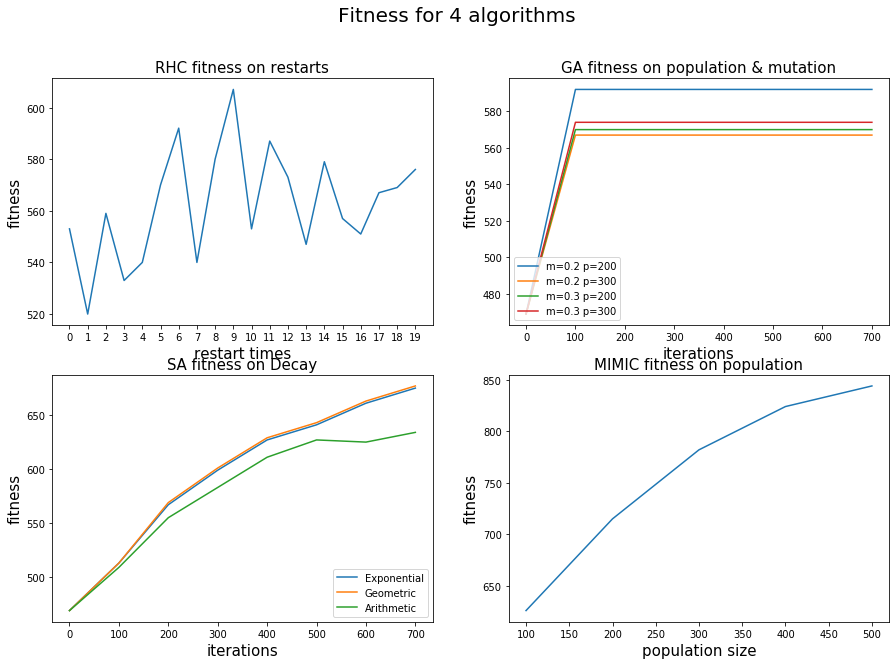

In [27]:
#pic for 4 parameters
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig.set_figheight(10)
fig.set_figwidth(15)
fig.suptitle('Fitness for 4 algorithms',fontsize=20)

ax1.plot(fit_array3_rhc)
ax1.set_xlabel("restart times",fontsize=15)
ax1.set_ylabel("fitness",fontsize=15)
ax1.set_title("RHC fitness on restarts",fontsize = 15)
ax1.set_xticks(range(0,20))

iter = range(0,750,100)
fit_ga_df = np.asarray(fit_ga_df2)
ax2.plot(iter,fit_ga_df2.T)
ax2.set_xlabel("iterations",fontsize=15)
ax2.set_ylabel("fitness",fontsize=15)
ax2.set_title("GA fitness on population & mutation",fontsize = 15)
legend_names = []
mutation = [0.2,0.3]
pop = [200,300]
for m in mutation:
    for p in pop:
        l = "m="+str(m)+" p="+str(p)
        legend_names.append(l)
ax2.legend(legend_names,loc='lower left')

iter = range(0,750,100)
ax3.plot(iter,fit_array_sa_all.T)
ax3.set_xlabel("iterations",fontsize=15)
ax3.set_ylabel("fitness",fontsize=15)
ax3.set_title("SA fitness on Decay",fontsize = 15)
ax3.legend(["Exponential","Geometric","Arithmetic"],loc='lower right')

pop = range(100,550,100)
ax4.plot(pop,fit_array3_mimic)
ax4.set_xlabel("population size",fontsize=15)
ax4.set_ylabel("fitness",fontsize=15)
ax4.set_title("MIMIC fitness on population",fontsize = 15)

fig.savefig("FFP-parameters")

[0.8070013523101807, 397.1034004688263, 389.5794816017151, 273.89046597480774, 330.79319977760315, 278.3986403942108, 289.5626494884491, 270.35676431655884]


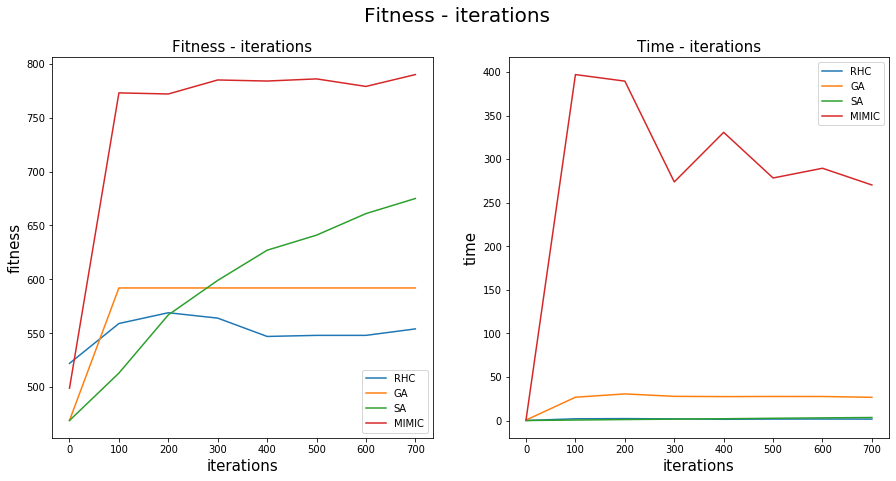

In [31]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figheight(7)
fig.set_figwidth(15)
fig.suptitle('Fitness - iterations',fontsize=20)

ax1.plot(iter,fit_array2_rhc)
ax1.plot(iter,fit_array2_ga)
ax1.plot(iter,fit_array2_sa)
ax1.plot(iter,fit_array2_mimic)
ax1.set_xlabel("iterations",fontsize=15)
ax1.set_ylabel("fitness",fontsize=15)
ax1.legend(["RHC","GA","SA","MIMIC"])
ax1.set_title("Fitness - iterations",fontsize=15)

ax2.plot(iter,time_array2_rhc)
ax2.plot(iter,time_array2_ga)
ax2.plot(iter,time_array2_sa)
time_array2_mimic2 = time_array2_mimic
# time_array2_mimic2[7] = 750
ax2.plot(iter,time_array2_mimic)
ax2.set_xlabel("iterations",fontsize=15)
ax2.set_ylabel("time",fontsize=15)
ax2.legend(["RHC","GA","SA","MIMIC"])
ax2.set_title("Time - iterations",fontsize=15)

print(time_array2_mimic)